# Pandas DataFrame for storing tweet feed (total 12 points)

Creating following date frame for storing tweets

- **climate_feed_df** DataFrame for storing tweet
- **retweeted_status_df** for storing original tweet

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
import ast
from bs4 import BeautifulSoup as bsp
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
!pip install contractions
import contractions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

--2021-05-13 02:26:33--  https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/retweeted_status_df.pkl [following]
--2021-05-13 02:26:33--  https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/retweeted_status_df.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13793850 (13M) [application/octet-stream]
Saving to: ‘retweeted_status_df.pkl.11’

retweeted_status_df 100%[===================>]  13.15M  10.2MB/s    in 1.3s    

2021-05-13 02:26:35 (10.2 MB/s) - ‘re

In [3]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

--2021-05-13 02:26:38--  https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/climate_feed.pkl [following]
--2021-05-13 02:26:38--  https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/climate_feed.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9122192 (8.7M) [application/octet-stream]
Saving to: ‘climate_feed.pkl.10’

climate_feed.pkl.10 100%[===================>]   8.70M  10.7MB/s    in 0.8s    

2021-05-13 02:26:39 (10.7 MB/s) - ‘climate_feed.pkl.10’ saved [91

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pkl file in the same directory as notebook

In [5]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [6]:
retweeted_status_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,Sat Feb 09 20:27:45 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,99.0,False,None,1.094332e+18,1094332044052549633,...,NaN,NaN,NaN,81.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",The National Party declares war on the Glouces...,True,"{'default_profile': False, 'protected': False,..."
2,NaN,None,Sat Feb 09 23:56:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,6.0,False,None,1.094385e+18,1094384528267902977,...,"{'favorited': False, 'favorite_count': 2642, '...",1.093999e+18,1093998640392220673,5.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",This is the same idiot who thought\nThe southe...,False,"{'default_profile': False, 'protected': False,..."
3,NaN,None,Sat Feb 09 23:34:27 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,190.0,False,None,1.094379e+18,1094379028608438272,...,"{'favorited': False, 'favorite_count': 220, 'i...",1.093932e+18,1093931686998487040,31.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Communism is Fascism. Fighting Climate Change ...,True,"{'default_profile': False, 'protected': False,..."
4,NaN,None,Sat Feb 09 19:07:56 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,2905.0,False,None,1.094312e+18,1094311957669265408,...,NaN,NaN,NaN,599.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Unmitigated climate change would literally des...,True,"{'default_profile': True, 'protected': False, ..."
5,NaN,None,Sat Feb 09 23:41:20 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,100.0,False,None,1.094381e+18,1094380759719260162,...,NaN,NaN,NaN,14.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@realDonaldTrump Climate change denial has not...,True,"{'default_profile': False, 'protected': False,..."
6,NaN,None,Sat Feb 09 16:44:41 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,2290.0,False,None,1.094276e+18,1094275905378308096,...,NaN,NaN,NaN,447.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday! Friendly reminder that climate...,False,"{'default_profile': True, 'protected': False, ..."
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,None,Sat Feb 09 20:41:00 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,166.0,False,None,1.094335e+18,1094335377194799104,...,NaN,NaN,NaN,79.0,False,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",Blue marble no more? https://t.co/hFLndZsiBB,False,"{'default_profile': False, 'protected': False,..."
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,None,None,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",.@SteveKingIA says he's unsure about the scien...,True,31476142
1,None,None,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",RT @RobOakeshott1: The National Party declares...,False,996782298
2,None,None,Sun Feb 10 00:17:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389844078485506,1094389844078485506,...,NaN,1093998640392220673,1093998640392220673,5,False,1.094385e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @emilia_suze: This is the same idiot who th...,False,45333453
3,None,None,Sun Feb 10 00:17:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389837522599936,1094389837522599936,...,NaN,1093931686998487040,1093931686998487040,31,False,1.094379e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @PrettyBadLefty: Communism is Fascism. Figh...,False,1020067726532829185
4,None,None,Sun Feb 10 00:17:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389831419994112,1094389831419994112,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/android"" ...",RT @kenklippenstein: Unmitigated climate chang...,False,19889325
5,None,None,Sun Feb 10 00:17:21 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389825266900998,1094389825266900998,...,NaN,NaN,NaN,14,False,1.094381e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @ChrisJZullo: @realDonaldTrump Climate chan...,False,16909343
6,None,None,Sun Feb 10 00:17:21 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389825132810245,1094389825132810245,...,NaN,NaN,NaN,447,False,1.094276e+18,"<a href=""http://twitter.com/download/android"" ...",RT @alexanderbruz: Happy Saturday! Friendly re...,False,908017796881240064
7,None,None,Sun Feb 10 00:17:20 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389819239686144,1094389819239686144,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","@kantarjiev @gsheyner Yes, this downtown parki...",True,1065520951150800896
8,None,None,Sun Feb 10 00:17:19 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389815141982211,1094389815141982211,...,NaN,NaN,NaN,79,False,1.094335e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @GeorgeTakei: Blue marble no more? https://...,False,943754900
9,None,None,Sun Feb 10 00:17:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,0,False,None,1094389813174779904,1094389813174779904,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://Cantoncommunitytelevision.org""...",Coming up next on CCTV's government channel (C...,False,64454244


Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [8]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) replace None with nan in climate_feed_df. Also display some random rows.


In [9]:
# write code here
climate_feed_df = climate_feed_df.fillna(value=np.nan)
climate_feed_df.replace('None', np.nan, inplace=True)
climate_feed_df.sample()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
3931,NaN,NaN,Sat Feb 09 23:00:36 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,1,False,NaN,1094370507321790465,1094370507321790465,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...","@DoctorKarl Oh my god, CARBON.......😱😱😱 Cue th...",False,2882986945


Working with only selected attributes.

In [10]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [11]:
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text
5078,Sat Feb 09 22:34:25 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094335e+18,False,954845161309253632,RT @SiddonsDan: “Does God’s creation not inclu...
6122,Sat Feb 09 22:14:05 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094356e+18,False,761311652302102529,RT @NPR: Whale poop is... bright orange? With ...
2839,Sat Feb 09 23:23:50 +0000 2019,"{'hashtags': [{'indices': [110, 123], 'text': ...",1.094091e+18,False,618559420,RT @HilliardForCong: Thank you Rep. Eric Swalw...
3130,Sat Feb 09 23:18:07 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,False,1033523497,@GOP Not addressing climate change will result...
2920,Sat Feb 09 23:22:29 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,False,1029460692930310145,https://t.co/CmhD0Oymsx
1307,Sat Feb 09 23:52:08 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094379e+18,False,1080142672503939073,RT @eugenegu: @realDonaldTrump And FYI climate...
3991,Sat Feb 09 22:59:39 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094303e+18,False,305198624,RT @SenSanders: President Trump believes we sh...
9508,Sat Feb 09 21:07:18 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094341e+18,False,975526140931690497,RT @H_Hawks16: Nothing man can do will stop cl...
6265,Sat Feb 09 22:10:57 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094303e+18,False,2323116235,RT @SenSanders: President Trump believes we sh...
3937,Sat Feb 09 23:00:29 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093905e+18,False,535572415,RT @brianschatz: I’m not a socialist. But I be...


# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [12]:
climate_feed_df.created_at = pd.to_datetime(climate_feed_df["created_at"])
climate_feed_df.truncated = climate_feed_df.truncated.astype(bool)

Checking datatype again

In [13]:
climate_feed_df.dtypes

created_at          datetime64[ns]
entities                    object
retweeted_status           float64
truncated                     bool
user_id                      int64
text                        object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [14]:
for (columnName, columnData) in climate_feed_df.iteritems():
    print(f"Number of NaA in {columnName}: {climate_feed_df[columnName].isna().sum()}")


Number of NaA in created_at: 0
Number of NaA in entities: 0
Number of NaA in retweeted_status: 2690
Number of NaA in truncated: 0
Number of NaA in user_id: 0
Number of NaA in text: 0


We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a columns named hashtags. Values in this columns should be command separated values of **text** attribute in **hashtags**  value.
 - Create a columns named user_mentions. Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [15]:
climate_feed_df["hashtags"] = ""
climate_feed_df["user_mentions"] = ""

h = []
um = []

for e in climate_feed_df.entities:
    e_text = ast.literal_eval(e)
    h.append(",".join([sub["text"] for sub in e_text["hashtags"]]))
    um.append(",".join([sub["name"] for sub in e_text["user_mentions"]]))

climate_feed_df["hashtags"] = np.array(h)
climate_feed_df["user_mentions"] = np.array(um)

climate_feed_df[["hashtags", "user_mentions"]].head(23)

,hashtags,user_mentions
0,,Steve King
1,,Rob Oakeshott
2,,Suze Michelini
3,,Chad Vigorous
4,,Ken Klippenstein
5,,"♻️🇺🇸 Christopher Zullo,Donald J. Trump"
6,,Alexander Bruesewitz
7,,"Chris Kantarjiev,Gennady Sheyner"
8,,George Takei
9,,


# Cleaning tweets

Let's see some random tweets

In [16]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

690        RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
8099         RT @farmingforever: Gloucester community celebrates court decision while Nationals MP bats for coal mining company (and subsequently accuse…
1067          RT @theintercept: “I do not think that for the future of humanity, and for our country to continue to prosper, that we cannot have another…
2821         RT @ida_skibenes: Science/history based education is key to a thriving community. It’s key to end the skepticism around climate change. It’…
6545         RT @marklevinshow: The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…
9869       RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
3888       RT @ejn_greencareer: Climate change is driving this possum toward

**Example of tweet not truncated**

In [17]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [18]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [19]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [20]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



In [21]:
client_key = "B8B4SzayN8knUJ3EoNwUUP1sQ"
client_secret =  "DSOc3mtsPGnpHG2IPFeMPWK6FREIWUjYVcZkgBUjaeN3lc9PaQ"

import requests
import base64

key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

base_url = 'https://api.twitter.com/'
auth_endpoint = base_url+'oauth2/token'

auth_headers = { 'Authorization': 'Basic {}'.format(b64_encoded_key),
                'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'}

auth_data = { 'grant_type': 'client_credentials'}

response = requests.post(auth_endpoint, headers=auth_headers, data=auth_data)
response.status_code

json_data =  response.json()
print(json_data)

access_token = json_data['access_token']

search_headers = {'Authorization': 'Bearer {}'.format(access_token)}

{'token_type': 'bearer', 'access_token': 'AAAAAAAAAAAAAAAAAAAAAJbEOwEAAAAAinPz0I0MvM3U1%2Bgiez3tVVx9wgA%3DhBQk2KZwtCaznMnKj3PAQ6WVf91MqhQqp18mGjydiQ8LoxreYR'}


# Q5(points 3.5= 1(use of requests and text extraction from right html element)+.5+1+1 ) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [22]:
climate_feed_df["original_tweet_text"] = None

for index, row in climate_feed_df.head(50).iterrows():
    if np.isnan(row['retweeted_status']):
        # print(f"{index}: No ID")
        continue
    tweet_id = int(row['retweeted_status'])
    parameters = { 'id': tweet_id, 'count': 100, 'tweet_mode': 'extended' }
    tweet_url = f"{base_url}1.1/statuses/lookup.json?id={tweet_id}"
    response = requests.get(tweet_url, headers=search_headers, params=parameters)
    if "errors" not in response.json():
        t = response.json()
        if len(t) == 0:
            # print(f"{index}: json empty - {tweet_url}")
            continue
        tweet = dict(t[0])
        
        no_url = re.sub(r'\\[\\n]+.|http\S+|@\S+[:]|@\S+|[\n]+[.]', '', tweet["full_text"])
        climate_feed_df.at[index, "original_tweet_text"] = no_url
    else:
        print(response.json())

In [23]:
climate_feed_df[["text", 'retweeted_status', "original_tweet_text"]].head(50)

,text,retweeted_status,original_tweet_text
0,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,NaN,None
1,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",1.094332e+18,None
2,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1.094385e+18,None
3,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",1.094379e+18,None
4,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,1.094312e+18,Unmitigated climate change would literally destroy civilization but doing something about it might increase the deficit so it’s kind of a wash
5,RT @ChrisJZullo: @realDonaldTrump Climate change denial has nothing to do with science or economics. It’s about profit for polluters. We li…,1.094381e+18,None
6,RT @alexanderbruz: Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!,1.094276e+18,Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!
7,"@kantarjiev @gsheyner Yes, this downtown parking garage is a mess. PA City Council just adopted climate change as a… https://t.co/IgErZKxhqv",NaN,None
8,RT @GeorgeTakei: Blue marble no more? https://t.co/hFLndZsiBB,1.094335e+18,Blue marble no more?
9,"Coming up next on CCTV's government channel (Comcast22/Verizon42)\n2/9/2019 9:00:00 PM: MVP on Climate Change Jan. 28, 2019",NaN,None


# Q 6(point 1= .5+.5) Remove all the reference  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [25]:
climate_feed_df.text.replace(to_replace='^RT|\\[\\n]+.|http\S+|@\S+[:]|@\S+|[\n]+[.]', value='', inplace=True, regex=True)

In [26]:
climate_feed_df[["text", "original_tweet_text"]].head(50)

,text,original_tweet_text
0,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,None
1,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None
2,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,None
3,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None
4,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,Unmitigated climate change would literally destroy civilization but doing something about it might increase the deficit so it’s kind of a wash
5,Climate change denial has nothing to do with science or economics. It’s about profit for polluters. We li…,None
6,Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!,Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!
7,"Yes, this downtown parking garage is a mess. PA City Council just adopted climate change as a…",None
8,Blue marble no more?,Blue marble no more?
9,"Coming up next on CCTV's government channel (Comcast22/Verizon42)\n2/9/2019 9:00:00 PM: MVP on Climate Change Jan. 28, 2019",None


# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. 

If *original_tweet_text* is None  then use climate_feed_df.text 

otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words doesn't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [27]:
climate_feed_df['final_tweet_text'] = climate_feed_df['original_tweet_text'].fillna(climate_feed_df['text'])

In [29]:
climate_feed_df[["text", "original_tweet_text", "final_tweet_text"]].head(50)

,text,original_tweet_text,final_tweet_text
0,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,None,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…
1,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…"
2,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,None,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.
3,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…"
4,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,Unmitigated climate change would literally destroy civilization but doing something about it might increase the deficit so it’s kind of a wash,Unmitigated climate change would literally destroy civilization but doing something about it might increase the deficit so it’s kind of a wash
5,Climate change denial has nothing to do with science or economics. It’s about profit for polluters. We li…,None,Climate change denial has nothing to do with science or economics. It’s about profit for polluters. We li…
6,Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!,Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!,Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!
7,"Yes, this downtown parking garage is a mess. PA City Council just adopted climate change as a…",None,"Yes, this downtown parking garage is a mess. PA City Council just adopted climate change as a…"
8,Blue marble no more?,Blue marble no more?,Blue marble no more?
9,"Coming up next on CCTV's government channel (Comcast22/Verizon42)\n2/9/2019 9:00:00 PM: MVP on Climate Change Jan. 28, 2019",None,"Coming up next on CCTV's government channel (Comcast22/Verizon42)\n2/9/2019 9:00:00 PM: MVP on Climate Change Jan. 28, 2019"


In [30]:
climate_feed_df.loc[3931]

created_at                                                                                                                                                                    2019-02-09 23:00:36
entities               {'hashtags': [], 'user_mentions': [{'id_str': '21147300', 'name': 'Dr Karl', 'screen_name': 'DoctorKarl', 'indices': [0, 11], 'id': 21147300}], 'urls': [], 'symbols': []}
retweeted_status                                                                                                                                                                              NaN
truncated                                                                                                                                                                                    True
user_id                                                                                                                                                                                2882986945
text                          

# Emoji detection

See this example of emoji as unicode characters

In [31]:
climate_feed_df['final_tweet_text'].loc[3931]

' Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [32]:
emoji_regex_test = re.compile(r"\U0001F631", re.UNICODE)

In [33]:
emoji_regex_test.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [34]:
! pip install emoji

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [35]:
import emoji

In [36]:
# https://blog.finxter.com/how-to-extract-all-emojis-from-text-in-python/
emoji_dict = emoji.UNICODE_EMOJI['en']

emojis_iter = map(lambda y: y, emoji_dict.keys())
regex_set = re.compile('|'.join(re.escape(em) for em in emojis_iter))

emoji_dict

{'🥇': ':1st_place_medal:',
 '🥈': ':2nd_place_medal:',
 '🥉': ':3rd_place_medal:',
 '🆎': ':AB_button_(blood_type):',
 '🏧': ':ATM_sign:',
 '🅰': ':A_button_(blood_type):',
 '🇦🇫': ':Afghanistan:',
 '🇦🇱': ':Albania:',
 '🇩🇿': ':Algeria:',
 '🇦🇸': ':American_Samoa:',
 '🇦🇩': ':Andorra:',
 '🇦🇴': ':Angola:',
 '🇦🇮': ':Anguilla:',
 '🇦🇶': ':Antarctica:',
 '🇦🇬': ':Antigua_&_Barbuda:',
 '♒': ':Aquarius:',
 '🇦🇷': ':Argentina:',
 '♈': ':Aries:',
 '🇦🇲': ':Armenia:',
 '🇦🇼': ':Aruba:',
 '🇦🇨': ':Ascension_Island:',
 '🇦🇺': ':Australia:',
 '🇦🇹': ':Austria:',
 '🇦🇿': ':Azerbaijan:',
 '🔙': ':BACK_arrow:',
 '🅱': ':B_button_(blood_type):',
 '🇧🇸': ':Bahamas:',
 '🇧🇭': ':Bahrain:',
 '🇧🇩': ':Bangladesh:',
 '🇧🇧': ':Barbados:',
 '🇧🇾': ':Belarus:',
 '🇧🇪': ':Belgium:',
 '🇧🇿': ':Belize:',
 '🇧🇯': ':Benin:',
 '🇧🇲': ':Bermuda:',
 '🇧🇹': ':Bhutan:',
 '🇧🇴': ':Bolivia:',
 '🇧🇦': ':Bosnia_&_Herzegovina:',
 '🇧🇼': ':Botswana:',
 '🇧🇻': ':Bouvet_Island:',
 '🇧🇷': ':Brazil:',
 '🇮🇴': ':British_Indian_Ocean_Territory:',
 '🇻🇬': ':British_Vir

# Q 8(1 point) Create a column  called *emoji*.  This coumns should contains a list of tuples for emoji detected in *final_tweet_text*. First element of tuple is the emoji detected and second is the text describing the emoji.

In [37]:
def emoji_tuple(emojis):
    if len(emojis) == 0:
        return None
    t = []
    for single_emoj in emojis:
        t.append((single_emoj, emoji_dict[single_emoj]))
    return t

def find_emojis(t):
    emojis = regex_set.findall(t)
    return emojis

In [38]:
#climate_feed_df_copy = climate_feed_df.copy()
climate_feed_df['emoji'] = None
climate_feed_df['emoji'] = climate_feed_df['final_tweet_text'].apply(regex_set.findall)
climate_feed_df['emoji'] = climate_feed_df['emoji'].apply(emoji_tuple)

In [39]:
climate_feed_df

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,final_tweet_text,emoji
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,,Steve King,None,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",,Rob Oakeshott,None,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,,Suze Michelini,None,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,None
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",,Chad Vigorous,None,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the deficit so it’s kind of a wash,Unmitigated climate change would literally destroy civilization but doing something about it might increase the deficit so it’s kind of a wash,None
5,2019-02-10 00:17:21,"{'hashtags': [], 'user_mentions': [{'id_str': '321774180', 'name': '♻️🇺🇸 Christopher Zullo', 'screen_name': 'ChrisJZullo', 'indices': [3, 15], 'id': 321774180}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [17, 33], 'id': 25073877}], 'urls': [], 'symbols': []}",1.094381e+18,True,16909343,Climate change denial has nothing to do with science or economics. It’s about profit for polluters. We li…,,"♻️🇺🇸 Christopher Zullo,Donald J. Trump",None,Climate change denial has nothing to do with science or economics. It’s about profit for polluters. We li…,None
6,2019-02-10 00:17:21,"{'hashtags': [], 'user_mentions': [{'id_str': '499154896', 'name': 'Alexander Bruesewitz', 'screen_name': 'alexanderbruz', 'indices': [3, 17], 'id': 499154896}], 'urls': [], 'symbols': []}",1.094276e+18,True,908017796881240064,Happy Saturday! Friendly remin

In [42]:
climate_feed_df['emoji'].loc[3931]

[('😱', ':face_screaming_in_fear:'),
 ('😱', ':face_screaming_in_fear:'),
 ('😱', ':face_screaming_in_fear:')]

In [43]:
climate_feed_df['emoji'].loc[9975]

[('🤦\u200d♂️', ':man_facepalming:')]

# We'll use wordcloud  to do elemetary exploratory data analysis(EDA). We'll do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [44]:
!pip install wordcloud

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [46]:
%matplotlib inline

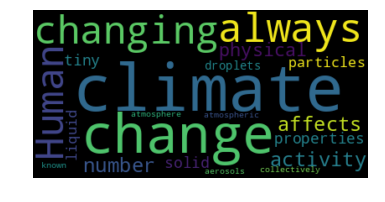

In [47]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [48]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split(' ')])

def expand_contractions(text):
    expanded_words = []    
    for word in text.split():
        expanded_words.append(contractions.fix(word))   

    return ' '.join(expanded_words)

def clean_text(text):
    stop = set(nltk.corpus.stopwords.words('english'))
    cleaned = expand_contractions(text.lower())
    tokens = word_tokenize(cleaned)
    cleaned = ' '.join([w for w in tokens if not w in stop])
    cleaned = lemmatize_text(cleaned)
    return cleaned

In [50]:
# Test:
# Before: Unmitigated climate change would literally destroy civilization but doing something about it might increase the deficit so it’s kind of a wash
# test = "Unmitigated climate change would literally destroy civilization but doing something about it might increase the deficit so it’s kind of a wash"
# print(f"Before: {test}")
# After: Unmitigated climate change would literally destroy civilization something might increase deficit kind wash
# test_clean = clean_text(test)
# print(f"Before: {test_clean}")
climate_feed_df['final_tweet_text_nltk'] = climate_feed_df['final_tweet_text'].apply(clean_text)

In [51]:
climate_feed_df[['final_tweet_text', 'final_tweet_text_nltk']]

,final_tweet_text,final_tweet_text_nltk
0,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,. say unsure science climate change . need scientist take ac…
1,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…","national party declares war gloucester community stood . remember , the…"
2,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,idiot thought southern alberta chinook climate change lol .
3,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…","communism fascism . fighting climate change kill million . apparently , allowed say shit msnbc.…"
4,Unmitigated climate change would literally destroy civilization but doing something about it might increase the deficit so it’s kind of a wash,unmitigated climate change would literally destroy civilization something might increase deficit kind wash
5,Climate change denial has nothing to do with science or economics. It’s about profit for polluters. We li…,climate change denial nothing science economics . profit polluter . li…
6,Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!,happy saturday ! friendly reminder climate change hoax ! great day everyone !
7,"Yes, this downtown parking garage is a mess. PA City Council just adopted climate change as a…","yes , downtown parking garage mess . pa city council adopted climate change a…"
8,Blue marble no more?,blue marble ?
9,"Coming up next on CCTV's government channel (Comcast22/Verizon42)\n2/9/2019 9:00:00 PM: MVP on Climate Change Jan. 28, 2019","coming next cctv 's government channel ( comcast22/verizon42 ) 2/9/2019 9:00:00 pm : mvp climate change january 28 , 2019"


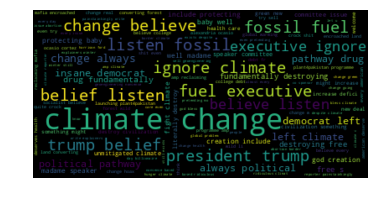

In [52]:
text = " ".join(t for t in climate_feed_df.final_tweet_text_nltk.astype(str))
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# Homework ends
# Final thoughts
He haven't done all the cleanup or used all the attributes for EDA.I just want to highlight one more clean up activity related to language.

In [ ]:
!pip install enchant  # errors
import enchant

In [ ]:
dictionary = enchant.Dict('en')

In [ ]:
climate_feed_df['text'].loc[5217]

In [ ]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]